In [1]:
import numpy  as np
import matplotlib.pyplot as plt
from ffd import deform

In [2]:
%reload_ext autoreload
%autoreload 2

def easy_draw(foil_data):
    # p = foil_data
    x = foil_data[:,0]
    y = foil_data[:,1]
    z = foil_data[:,2]

    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    # ax.set_xlim(0,1)
    # ax.set_ylim(-0.5,0.5)
    # ax.set_zlim(-0.5,0.5)

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.zaxis.set_visible(False)

    ax.scatter3D(x,y,z,s=0.5)
    ax.view_init(elev=0, azim=45)
    plt.axis('off')
    plt.show()
    plt.close()
    return 

In [ ]:
def draw_plot_point(mesh,point,name = 'test',path = 'pic',elev=-15,azim=20):
    def draw_geom1(foil_data,ax,alpha=0.7):
    # p = foil_data
        
        x = foil_data[:,:,0]
        y = foil_data[:,:,1]
        z = foil_data[:,:,2]
       
       
        ax.scatter3D(x,y,z,c = 'slategrey',s = 20,alpha = alpha)

        plt.axis('off')

        return ax    
    def draw_ffd1(foil_data,ax):
        # p = foil_data
        x = foil_data[:,0]
        y = foil_data[:,1]
        z = foil_data[:,2]

        ax.scatter3D(x,y,z,s=20,c = 'r')

        return ax
    def draw_round(foil_data,ax):
        # p = foil_data
        x = foil_data[:,:,0].reshape(-1)
        y = foil_data[:,:,1].reshape(-1)
        z = foil_data[:,:,2].reshape(-1)

        ax.plot3D(x,y,z,alpha = 0.5,c='b')

        # plt.axis('off')
        
        # plt.close()

        return ax
    fig = plt.figure(figsize=(45,21))
    ax = plt.axes(projection="3d")
    # ax.set_xlim(0,1)
    # ax.set_ylim(-0.5,0.5)
    # ax.set_zlim(-0.5,0.5)

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.zaxis.set_visible(False)
    ax.view_init(elev=-20, azim=15)

    plt.axis('off')
    
 
    ax = draw_geom1(mesh,ax)
    t_point = point.reshape(-1,3)

    
    ax = draw_ffd1(t_point,ax)
    new_plots = point
    for i in range(new_plots.shape[0]):
        a = new_plots[i,:,:,:]
        a = a.transpose(1,0,2)
        a[0,:,:] = a[0,::-1,:]
        p1  = a[0,0,:]
        p2  = a[-1,-1,:]
        ax = draw_round(a,ax)
        ax.plot3D([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],alpha = 1,c='b')
    

    ax.view_init(elev=elev, azim=azim)

    plt.savefig(path + '/' + name)
    # plt.show()
    
    plt.close()
    return 
def ffd_transform3(foil_data,dim = (3,7,1),scale = 0.5,p = 0):
    
    geom = foil_data.reshape(-1,3)

    para,point = deform.get_ffd(geom,dim)

    new_plots = point.reshape(dim[0]+1,dim[1]+1,dim[2]+1,3)
    
    dis_plots = new_plots[[p],:,:,:].reshape(-1,3)

    dis_plots[:,[1,2]] = dis_plots[:,[1,2]] * scale

    dis_plots = dis_plots.reshape(1,dim[1]+1,dim[2]+1,3)
    new_plots[[p],:,:,:] = dis_plots
    
    tmp  = new_plots.reshape(-1,3)
    new_mesh = np.dot(para,tmp)

    new_mesh = new_mesh.reshape(*(foil_data.shape))

    return new_mesh,new_plots

In [ ]:
path = 'F:\\graduate_student\\T2_GANpropeller\\test5\\0_database\\mixed_model\\'

column  = np.load(path + 'Column.npy')
tangent = np.load(path + 'Tangent.npy')
tapered = np.load(path + 'Tapered.npy')
total_data = np.concatenate((column,tangent,tapered),0)

mean_data = np.mean(total_data,0)
print(mean_data.shape)

In [ ]:
mesh,plot = ffd_transform3(mean_data,(5,9,1),1)
# print(plot.shape,mesh.shape)
draw_plot_point(mesh,plot,'test','pic',75,0)

In [ ]:
import random
def get_inverse(mean_geom,dim,num,geom_list):
    
    mean_geom = mean_geom.reshape(-1,3)
    mean_para,mean_point = deform.get_ffd(mean_geom,dim) 
    x = np.linalg.pinv(mean_para)

    # 求伪逆
    # print(mean_geom.shape,x.shape,mean_point.shape)
    # print(np.sum(abs(mean_para.dot(x)-mean_geom)))


    fake_meshs = []
    fake_plots = []
    errs       = []

    lenth = geom_list.shape[0]
    posi = random.sample(range(1,lenth),num)

    for i in posi:
        cur_mesh = geom_list[i].reshape(-1,3)
        
        cur_x = x.dot(cur_mesh)
        fake_plots.append(cur_x)
        
        fake_mesh = mean_para.dot(cur_x)
        fake_meshs.append(fake_mesh)
        errs.append(np.mean(np.power(fake_mesh - cur_mesh,2)))

    fake_meshs = np.array(fake_meshs)

    return fake_meshs,fake_plots,errs, posi

In [ ]:
fake_meshs,fake_plots,errs,posi = get_inverse(mean_data,(5,9,1),100,total_data)
print(np.mean(errs),np.std(errs))

In [ ]:
def easy_draw1(foil_data1,foil_data2):
    # p = foil_data
    x = foil_data1[::4,0]
    y = foil_data1[::4,1]
    z = foil_data1[::4,2]
    x1 = foil_data2[:,0]
    y1 = foil_data2[:,1]
    z1 = foil_data2[:,2]

    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    # ax.set_xlim(0,1)
    # ax.set_ylim(-0.5,0.5)
    # ax.set_zlim(-0.5,0.5)

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.zaxis.set_visible(False)

    ax.scatter3D(x,y,z,s=6,c = 'b')
    ax.scatter3D(x1,y1,z1,s=2,c = 'r',alpha = 0.3)
    ax.view_init(elev=90, azim=0)
    plt.axis('off')
    plt.show()
    plt.close()
    return 

In [ ]:
for i in range(4):
    easy_draw1(fake_meshs[i],total_data[posi[i]].reshape(-1,3))
    print(errs[i])

# 随机变化效果

In [ ]:
def ffd_transform(foil_data,dim = (3,7,1),scale = 0.1):
    
    geom = foil_data.reshape(-1,3)

    para,point = deform.get_ffd(geom,dim)

    new_plots0 = point.reshape(dim[0]+1,dim[1]+1,dim[2]+1,3)
    
    new_meshs = []
    for i in range(512):
        noise = np.random.randn(*(new_plots0.shape)) 
        
        new_plots = new_plots0[:,:,:,[1,2]] + noise[:,:,:,[1,2]] * scale
        
        tmp  = np.concatenate((new_plots0[:,:,:,[0]],new_plots),-1).reshape(-1,3)
        new_mesh = np.dot(para,tmp)

        new_mesh = new_mesh.reshape(*(foil_data.shape))
        new_meshs.append(new_mesh)
    return np.array(new_meshs)

def easy_save(foil_data, path):
    # p = foil_data
    foil_data = foil_data.reshape(-1,3)
    x = foil_data[:,0]
    y = foil_data[:,1]
    z = foil_data[:,2]

    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    # ax.set_xlim(0,1)
    # ax.set_ylim(-0.5,0.5)
    # ax.set_zlim(-0.5,0.5)

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.zaxis.set_visible(False)

    ax.scatter3D(x,y,z,s=0.5)
    ax.view_init(elev=75, azim=0)
    plt.axis('off')
    plt.savefig(path)
    plt.close()
    return 


In [ ]:
new_meshs = ffd_transform(mean_data,(5,9,1),30)

for i,j in enumerate(new_meshs):

    path = 'FFD_vari/'+str(i)
    easy_save(j.reshape(-1,3),path)

In [ ]:
d1 = np.mean(column,0)
d2 = np.mean(tapered,0)
d3 = np.mean(tangent,0)

easy_save(d1,'pic/column')
easy_save(d2,'pic/tapered')
easy_save(d3,'pic/tangent')

In [ ]:
import random
def easy_surface(foil_data,ax, path = ''):
    # p = foil_data
    foil_data = foil_data.reshape(-1,3)
    x = foil_data[::2,0]
    y = foil_data[::2,1]
    z = foil_data[::2,2]


    # ax.set_xlim(0,1)
    # ax.set_ylim(-0.5,0.5)
    # ax.set_zlim(-0.5,0.5)

    # ax.plot_surface(x,y,z,rstride = 1,cstride = 1, cmap= 'gist_yarg',alpha = 0.3)
    ax.scatter3D(x,y,z,s=20,alpha = 0.2 ,c='slategrey')
    return ax

def get_meshcloud(new_meshs,save_path,num  = 100):

    posi =random.sample(range(1,new_meshs.shape[0]),num)
    new_meshs = new_meshs[posi]
    fig = plt.figure(figsize=(40, 28))
    ax = plt.axes(projection="3d")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.zaxis.set_visible(False)
    for i in new_meshs:
        ax = easy_surface(i,ax)

    ax.view_init(elev=75, azim=0)
    plt.axis('off')
    plt.savefig(save_path)
    plt.close()

def get_meshcloud_mean(new_meshs,mean_meshs,save_path,num  = 100):

    posi =random.sample(range(1,new_meshs.shape[0]),num)
    new_meshs = new_meshs[posi]
    fig = plt.figure(figsize=(40, 28))
    ax = plt.axes(projection="3d")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.zaxis.set_visible(False)
    
    j = 0
    for mean_mesh in mean_meshs: 
        mean_mesh = mean_mesh.reshape(-1,3)
        x = mean_mesh[:,0]
        y = mean_mesh[:,1]
        z = mean_mesh[:,2]
        if j==0:
            ax.scatter3D(x,y,z,s=60,alpha = 1 ,c='salmon')
        if j==1:
            ax.scatter3D(x,y,z,s=60,alpha = 1 ,c='lightseagreen')
        if j==2:
            ax.scatter3D(x,y,z,s=60,alpha = 1 ,c='gold')
        
        j+=1
    for i in new_meshs:
        ax = easy_surface(i,ax)

    ax.view_init(elev=75, azim=0)
    plt.axis('off')
    plt.savefig(save_path)
    plt.close()

In [ ]:
import random
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.zaxis.set_visible(False)
posi =random.sample(range(1,3000),100)
for i in posi:
    ax = easy_surface(total_data[i],ax)

ax.view_init(elev=75, azim=0)
plt.axis('off')
plt.savefig('pic/real_all')
plt.close()

In [ ]:
fake_meshs = ffd_transform(mean_data)
np.save('ffd_fake',fake_meshs)

In [ ]:
column  = np.load(path + 'Column.npy')
tangent = np.load(path + 'Tangent.npy')
tapered = np.load(path + 'Tapered.npy')
total_data = np.concatenate((column,tangent,tapered),0)

# a = np.mean(column,0)[None,:]
# b = np.mean(tangent,0)[None,:]
# c = np.mean(tapered,0)[None,:]
a = column[500][None,:]
b = tangent[500][None,:]
c = tapered[500][None,:]
d = np.concatenate((a,b,c),0)

print(d.shape)

get_meshcloud_mean(total_data,d,'pic/ruled_all',60)

get_meshcloud_mean(column,a,'pic/column_all',10)
get_meshcloud_mean(tangent,b,'pic/tapered_all',10)
get_meshcloud_mean(tapered,c,'pic/tangent_all',10)

In [ ]:
ffdgan_mesh =  np.load('fake_mesh.npy')
get_meshcloud(ffdgan_mesh,'pic/ffd_gan_all',100)

In [ ]:
ffdgan_mesh =  np.load('easy_fpgan_three.npy')

get_meshcloud(ffdgan_mesh,'pic/fp_gan_easy',100)

# 多样性展示

In [3]:
from pyDOE import lhs
import matplotlib.image as img
import matplotlib.pyplot as plt
def get_group(name_list,save_path,pic_width,pic_heigh,figsize=(20,6)):
    column,row = len(name_list),len(name_list[0])
    
    fig = plt.figure(figsize=figsize)

    for i in range(column):
        for j in range(row):

            posi = j + i * row + 1
          
            ax = fig.add_subplot(column,row,posi)
            ax.axis('off')
            im   = img.imread(name_list[i][j])
            s = im.shape
            left  = (s[0] - pic_width)//2
            right = (s[0] + pic_width)//2
            below = (s[1] - pic_heigh)//2 
            upper = (s[1] + pic_heigh)//2

            im   = im[left:right ,below:upper,:]
            ax.imshow(im)
    plt.savefig(save_path)
    plt.show()
    plt.close()


import os
# all_files = os.listdir(path)

# # 仅保留以".png"结尾的文件
# png_files = [file for file in all_files if file.endswith('.png')]
import sys
sys.path.append('F:\\graduate_student\\T2_GANpropeller\\test5\\2_experiments\\FFD_PCA')
from draw import draw_geom_line,data_root

dr = data_root()+ 'mesh_data_test_modified.npy'
data_list = [dr,'complicated_ffd_vari.npy','complicated_ffdGAN.npy','complicated_ffdpca_vari.npy','complicated_ffdpcaGAN_vari.npy']
save_list = ['complicated_pic/real/','complicated_pic/ffd/','complicated_pic/ffd_gan/','complicated_pic/ffdpca/','complicated_pic/fp_gan/']


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


SystemError: <built-in method write of _io.BufferedWriter object at 0x0000028FCCEF9880> returned a result with an error set

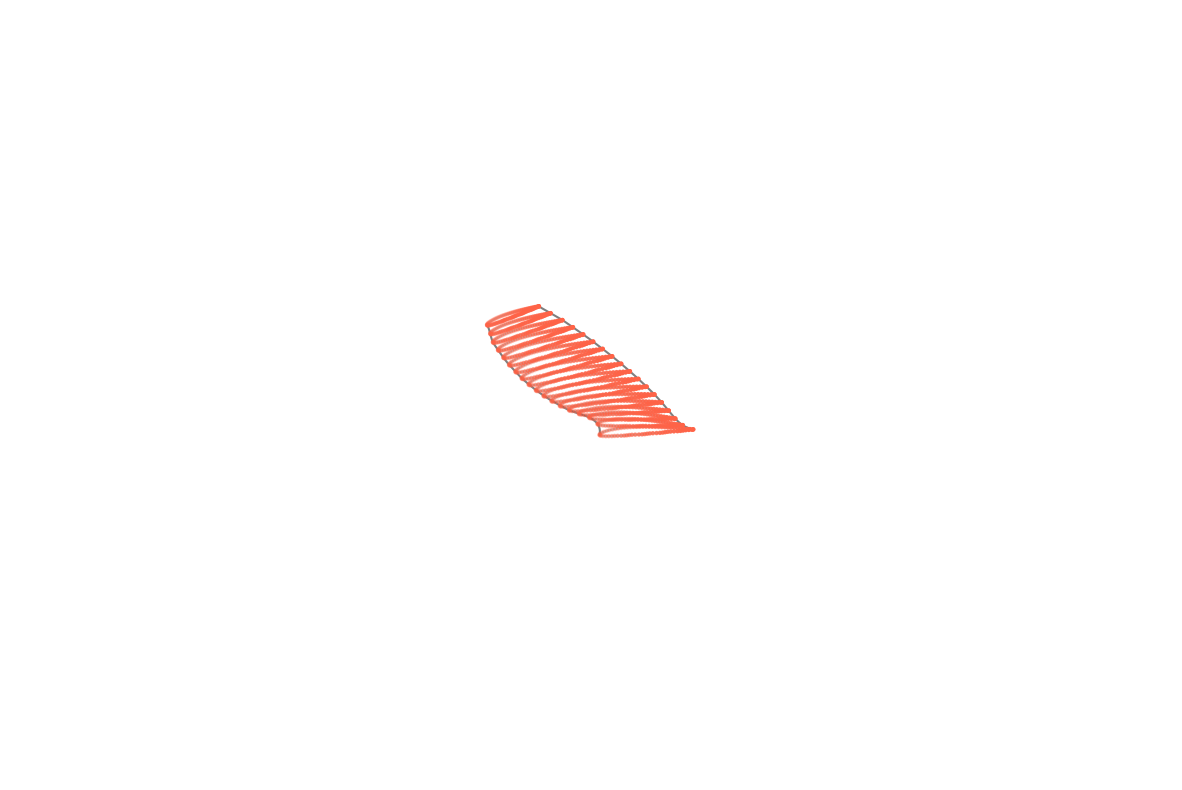

In [6]:

for i in [0,1,2,3,4]:

    data = np.load(data_list[i])
  
    path = save_list[i]
    data = data.reshape(-1,18,68,3)
    for j in range(data.shape[0]):
        # print(data[j].shape)
        mesh = data[j]
       
        name = str(j).zfill(4)
        a = draw_geom_line(mesh,name,path,-20,15)



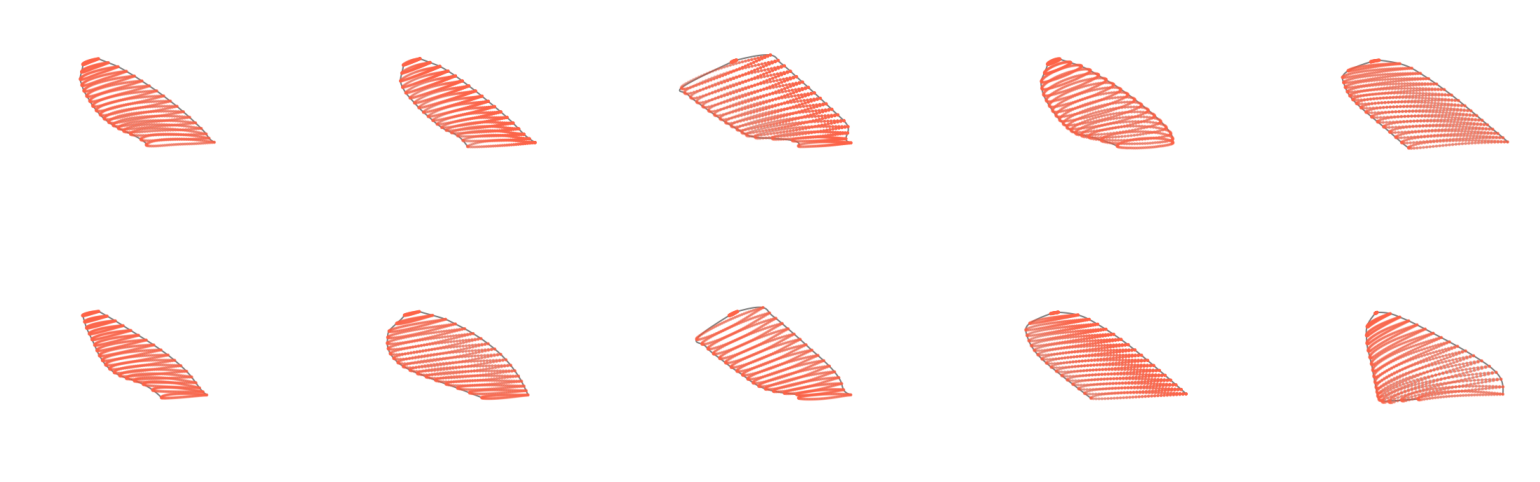

In [7]:
list = [['0427','0112','0200','0429','0296'],['0297','0303','0326','0052','1796']]
name_list_real = [['complicated_pic/real/'+_ + '.png' for _ in list[0]],\
                  ['complicated_pic/real/'+_ + '.png' for _ in list[1]]] 
get_group(name_list_real,'complicated_pic/real.png',300,340,(20,6))

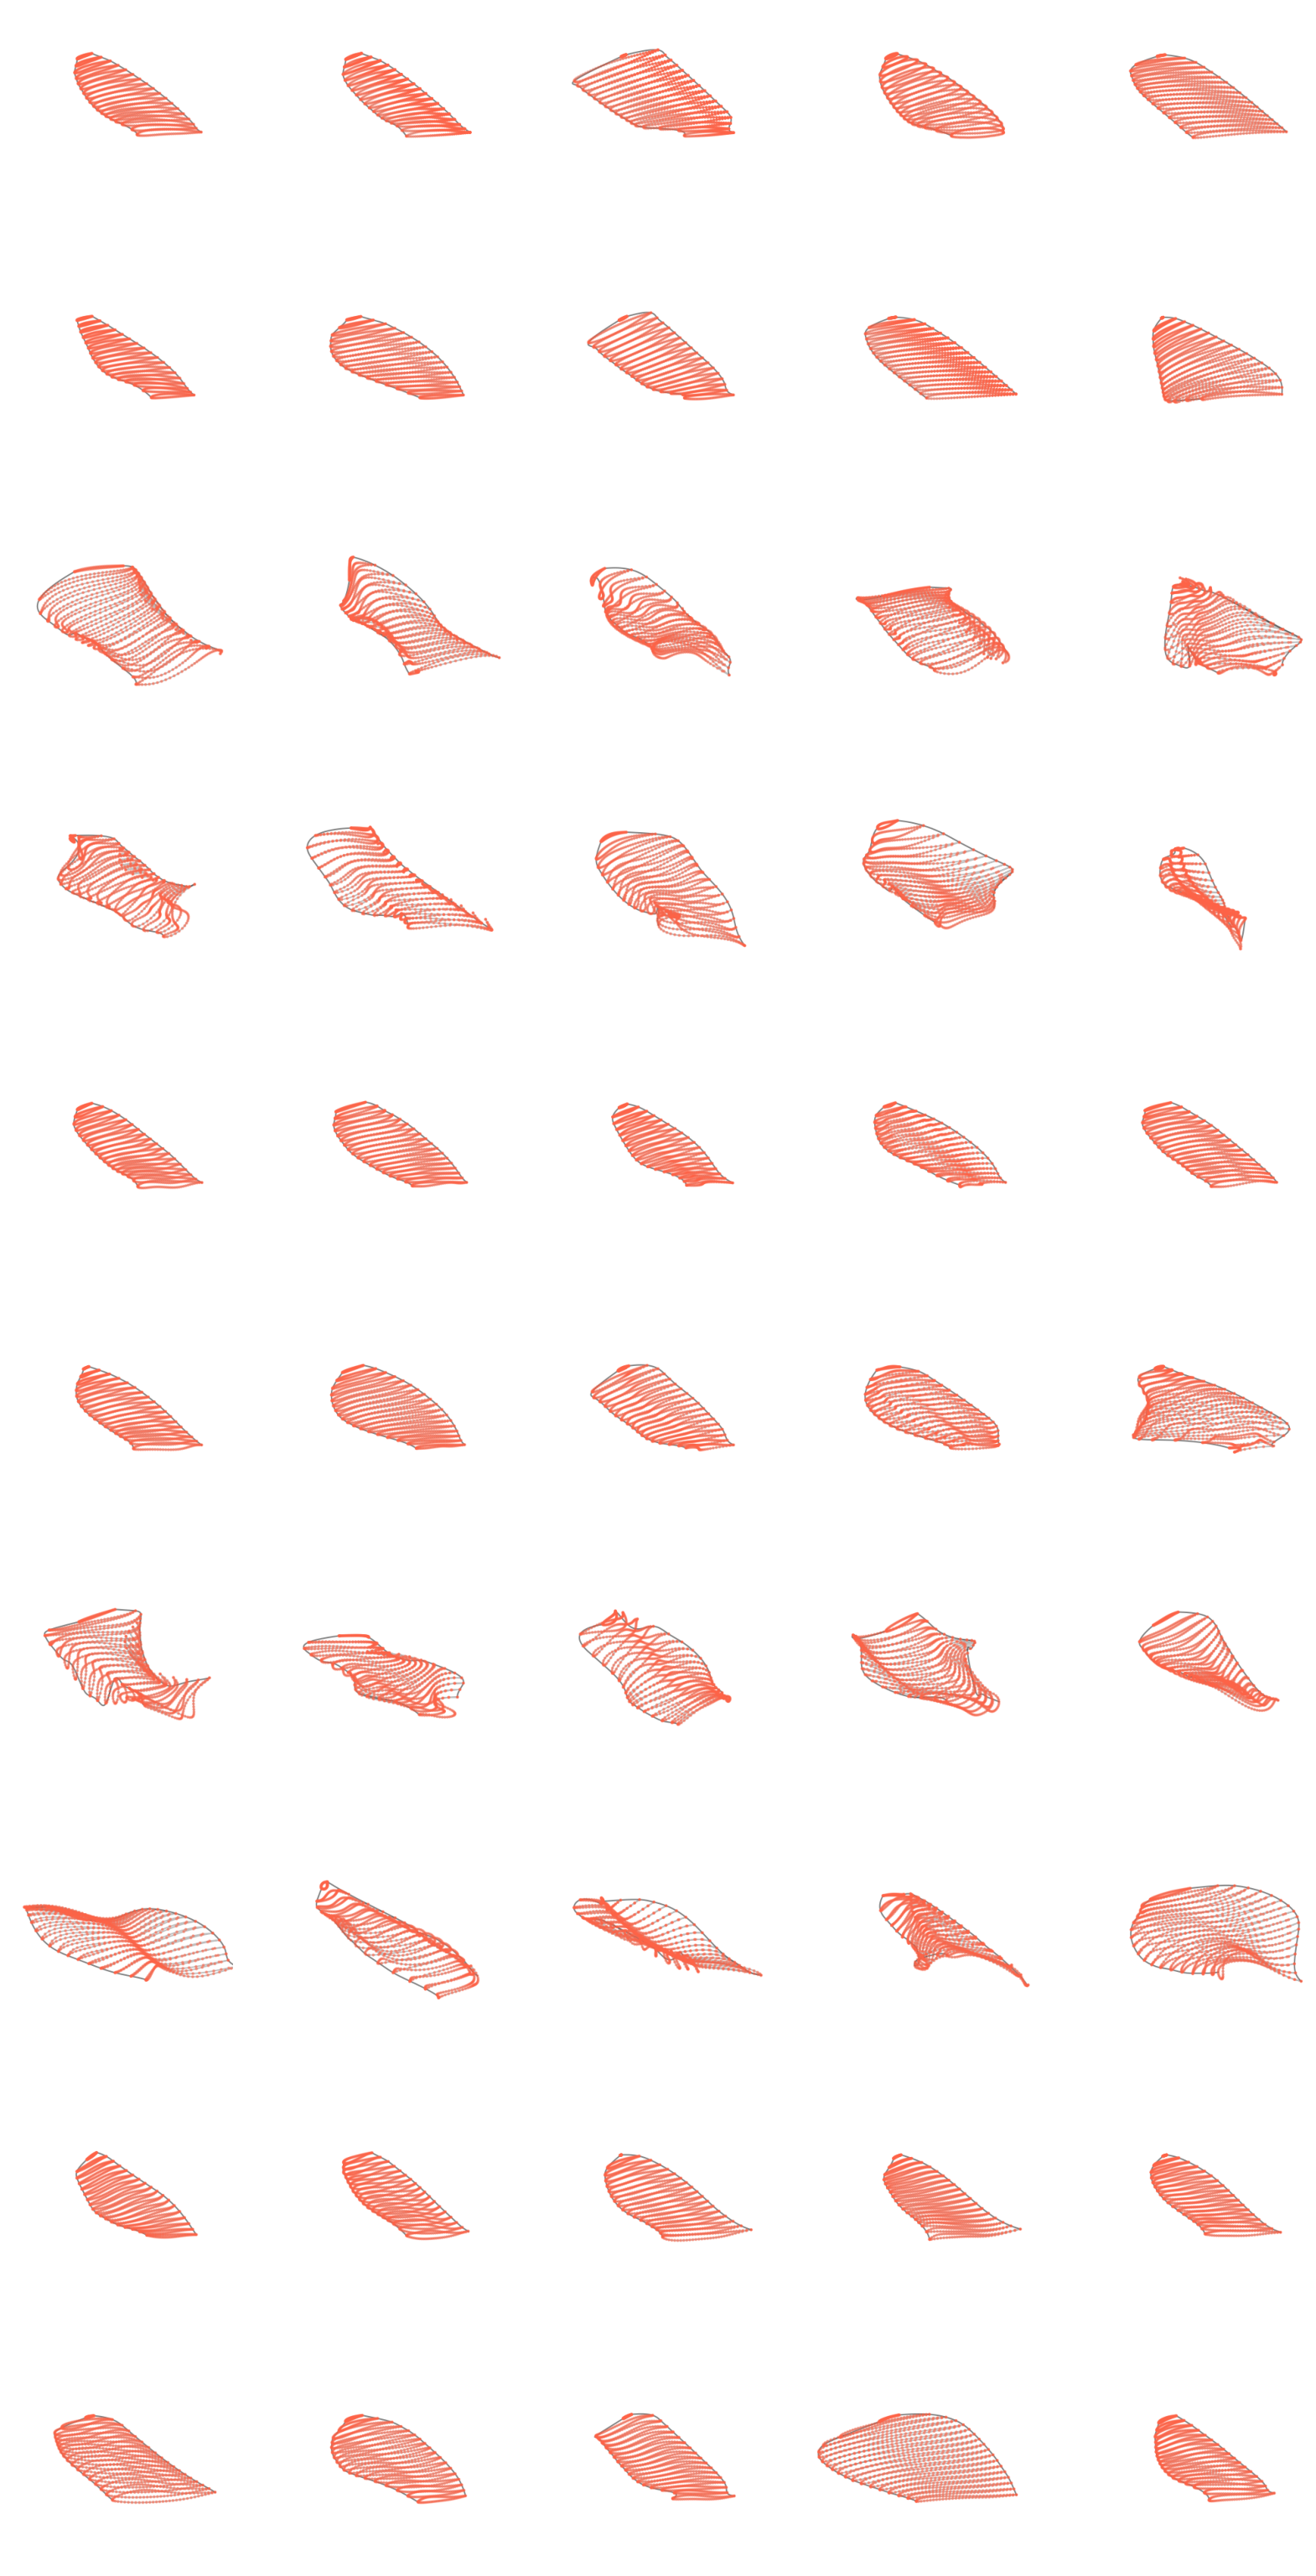

In [8]:
list0 = [['0427','0112','0200','0429','0296'],['0297','0303','0326','0052','1796'],
         ['0266','0000','0001','0002','0004'],['0008','0010','0011','0030','0032'],
         ['0001','0002','0003','0006','0017'],['0012','0007','0026','0018','0009'],
         ['0000','0004','0005','0006','0007'],['0009','0011','0014','0016','0023'],
         ['0167','0043','0074','0018','0094'],['0897','0080','0052','0687','0390']
         ]


j = 0
name_list = []
for i in range(1,11):
    if i//2 == 0:
        j += 1
    cur_list = []
    try:
        cur_path = save_list[(i-1)//2]
    except:
        break
    for k in range(len(list0[0])):
        cur_list.append(cur_path + list0[i-1][k]+'.png')
    name_list.append(cur_list)

# print(name_list)
get_group(name_list,'complicated_pic/total.png',300,340,(20,40))

# 做TSNE和体积图

In [ ]:
from draw import get_value_center,draw_section,draw_multi_tsne_distribution
import numpy as np
def get_g1(mesh,mean_c,mean_v,save_path=''):
    g1 = []

    for i in mesh:
        
        is_inter,is_water,v,c = get_value_center(i) 
        c0 = np.sqrt(np.sum(np.power(c-mean_c,2)))
        
        g1.append(np.array([c0,v/mean_v]))

    g1 = np.array(g1)
    # np.save(save_path,g1)
    return g1
from sklearn.manifold import TSNE
def get_tsne(*args):

    lenth = [0]

    for i,j in enumerate(args):

        if i==0:
            g = j
            lenth.append(g.shape[0])
        else:
            g = np.concatenate((g,j),0)
            lenth.append(g.shape[0])

    X_embedded = TSNE(n_components=2, learning_rate='auto',
                    init='random', perplexity=3).fit_transform(g)
    
    rlt = []

    for i in range(len(lenth)-1):
        rlt.append(X_embedded[lenth[i]:lenth[i+1],:])

    return rlt
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [ ]:
from draw import draw_geom_line,data_root

dr = data_root()+ 'mesh_data_test_modified.npy'
data_list = [dr,'complicated_ffd.npy','complicated_ffdGAN.npy','complicated_ffdpca_vari.npy','complicated_ffdpcaGAN_vari.npy','complicated_ffdpcaGAN.npy','complicated_ffdpca_base_meshs.npy']

data = []

for i in data_list:
    tmp = np.load(i)
    print(tmp.shape)
    data.append(tmp)
mean_mesh = np.mean(np.load(dr),0)
_,_,mean_v,mean_c = get_value_center(mean_mesh.reshape(-1,3))

In [ ]:
g1_list = []

import random

with HiddenPrints():
    for i in range(1,len(data_list)):
        tmp = data[i].reshape(-1,18*68,3)
        
        # a   = random.sample(range(1,tmp.shape[0]),200)
        # tmp = tmp[a]
        g1  =  get_g1(tmp,mean_c,mean_v,'complicated_pic/'+str(i))
        g1_list.append(g1)


In [ ]:
for i in  range(len(g1_list)):
    tg1 = g1_list[i]
    np.save('bigplot\g1_'+str(i),tg1)

In [ ]:
m_mesh       = mean_mesh[None,:]

gd1 = np.load('bigplot/g1_background.npy')
gd2 = get_tsne(np.load(data_list[0]).reshape(-1,18*68*3),m_mesh.reshape(-1,18*68*3))[0]

In [ ]:
gd = np.concatenate((gd1,gd2),1)

In [ ]:
import random

def get_plots(mesh,mean_c,mean_v,bg_mesh,p=200):
    mesh = mesh.reshape(-1,18*68*3)
    bg_mesh = bg_mesh.reshape(-1,18*68*3)
    try:
        a = random.sample(range(1,mesh.shape[0]),p)
        with HiddenPrints():
            mesh = mesh[a]
            mesh_cv = get_g1(mesh.reshape(-1,18*68,3),mean_c,mean_v)
            tsne12  = get_tsne(bg_mesh,mesh)[1]

            # mesh_cv = get_g1(mesh[a].reshape(-1,18*68,3),mean_c,mean_v)
            # tmps = []
            # for i in a:
            #     mesh0 = mesh[i][None,:]
            #     tmp     = get_tsne(bg_mesh,mesh0)[1]
            #     tmps.append(tmp)
            # tsne12 = np.array(tmps.reshape(-1,2))
    except:
        mesh_cv = get_g1(mesh.reshape(-1,18*68,3),mean_c,mean_v)
        tsne12  = get_tsne(bg_mesh,mesh)[1]
    print(mesh_cv.shape,tsne12.shape)
   
    plots = np.concatenate((mesh_cv,tsne12),1)

    return plots


In [ ]:
g_fpgan = get_plots(np.concatenate((data[4],data[5]),1),mean_c,mean_v,data[0],500)

In [ ]:
g_ffdgan = get_plots(data[2],mean_c,mean_v,data[0],2)

In [ ]:
g_ffd = get_plots(data[1],mean_c,mean_v,data[0],300)

In [ ]:
# g_mean = get_plots(m_mesh,mean_c,mean_v,data[0],1)
tmp = np.mean(g_ffd[:,[2,3]],0)
g_mean = np.array([0,1,tmp[0],tmp[1]])[None,:]
print(g_mean.shape)

In [ ]:

g_star = get_plots(data[6],mean_c,mean_v,data[0],100)

In [ ]:
a0 = np.argwhere(g_star[:,3]<-50)[:,0]
b1 = np.intersect1d(np.argwhere(g_star[:,2]>25),np.argwhere(g_star[:,2]<50))
b2 = np.intersect1d(np.argwhere(g_star[:,2]>-50),np.argwhere(g_star[:,2]<-25))
c0 = np.intersect1d(a0,b1)
c1 = np.intersect1d(a0,b2)
print(c0,c1)
# print(np.argwhere(g_star[:,3]<-50)[:,0])
# print(np.intersect1d(np.argwhere(g_star[:,2]>-25),np.argwhere(g_star[:,2]<0)))

In [ ]:
g_star0 = g_star[[c0[0],c1[0]],:]

In [ ]:
from scipy import spatial
def draw_list(crlist,ax,color = 'b'):
    
    hull = spatial.ConvexHull(crlist, qhull_options="QJ")
    poly = plt.Polygon(crlist[hull.vertices, :],alpha = 0.1, color = color)
    ax.add_patch(poly)
    
def get_data(g):
    
    crlist,betalist = g[:,[0,1]],g[:,[2,3]]
    
    return crlist,betalist

def draw_multi_tsne_distribution1(ax1,ax2,g1 ,g1_space = 8,g2_space = 1, *args):
    """
    g1:[质心距离平均的距离,体积,tsne0,tsne1] crlist,betalist对于数据集
    g2:[质心距离平均的距离,体积,tsne0,tsne1] 对于
    """
    
    g = g1
    g1_l = g1.shape[0]
    g2_l = [g1_l]
    for i,g2 in enumerate(args):
     
        g = np.concatenate((g,g2),axis=0)
        tmp =  g2.shape[0] + g2_l[i]
        g2_l.append(tmp)

    crlist_all,betalist_all = get_data(g)
    
    if True:
        
        crlist,betalist = crlist_all[:g1_l,:],betalist_all[:g1_l,:]
        tmp1 = np.argwhere(crlist[:,1]<-5000)[:,0]
        crlist = np.delete(crlist, tmp1 ,0)
        tmp2 = np.argwhere(crlist[:,1]>14)[:,0]
        crlist = np.delete(crlist, tmp2 ,0)
        mean_y = np.mean(crlist[:,1])
        ax1.axhline(y = mean_y,ls = '--',c = 'skyblue')
        crlist,betalist = crlist[::g1_space,:],betalist[::g1_space,:]
        

        ax1.scatter(crlist[:,0],crlist[:,1],c = 'skyblue',alpha =0.5,label = 'database')
        ax2.scatter(betalist[:,0],betalist[:,1],c = 'skyblue',alpha =0.5,label='database')

        # draw_list(crlist,ax1,color='skyblue')
        # draw_list(betalist,ax2,color='skyblue')    

    color_bar = ['darkorange','mediumpurple','blue','salmon','lime','deeppink','paleturquoise']
    c = -1

    for i in range(len(g2_l)-1):

        c+=1
        color = color_bar[c]
        crlist,betalist = crlist_all[g2_l[i]:g2_l[i+1],:],betalist_all[g2_l[i]:g2_l[i+1],:]

        # ax1.axvline()
        tmp1 = np.argwhere(crlist[:,1]<-5000)[:,0]
        crlist = np.delete(crlist, tmp1 ,0)
        tmp2 = np.argwhere(crlist[:,1]>14)[:,0]
        crlist = np.delete(crlist, tmp2 ,0)
        mean_y = np.mean(crlist[:,1])
        
        crlist,betalist = crlist[::g2_space,:],betalist[::g2_space,:]

        print(betalist.shape)
        if i ==0:
            ax1.scatter(crlist[:,0],crlist[:,1],c = color,alpha =0.5,label = 'fp_gan')
            ax2.scatter(betalist[:,0],betalist[:,1],c = color,alpha =0.5,label='fp_gan')
        if i ==1:
            ax1.scatter(crlist[:,0],crlist[:,1],c = color,alpha =0.5,label = 'ffd_gan')
            ax2.scatter(betalist[:,0],betalist[:,1],c = color,alpha =0.5,label='ffd_gan')
        # draw_list(crlist,ax1,color=color)
        try:
            draw_list(betalist,ax2,color=color) 
            ax1.axhline(y = mean_y,ls = '--',c = color)  
        except:
            
            ax1.scatter(crlist[:,0],crlist[:,1],marker='*', c = color,alpha =1,s=300,label = 'mean_cloud')
            ax2.scatter(betalist[:,0],betalist[:,1],marker='*', c = color,alpha =1,s=300,label = 'mean_cloud')

    return ax1,ax2

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlim(-0.01,0.025)
ax1.set_ylim(-1,14)
ax1,ax2 = draw_multi_tsne_distribution1(ax1,ax2,gd,3,1,g_fpgan,g_ffd,g_mean)

crlist,betalist = g_star0[:,[0,1]],g_star0[:,[2,3]]
tmp1 = np.argwhere(crlist[:,1]<-5000)[:,0]
crlist = np.delete(crlist, tmp1 ,0)
tmp2 = np.argwhere(crlist[:,1]>14)[:,0]
crlist = np.delete(crlist, tmp2 ,0)

# ax1.scatter(crlist[:,0],crlist[:,1],marker='*', c ='lime',alpha =1,s=100,label = 'base_cloud')
ax2.scatter(betalist[:,0],betalist[:,1],marker='*', c = 'deeppink',alpha =1,s=300,label = 'base_cloud')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

ax1.set_xlabel('$d(c,c_0)$')
ax1.set_ylabel('$v/v_0 $')
ax2.set_xlabel('tSNE1')
ax2.set_ylabel('tSNE2')

plt.savefig('tsne.png')
plt.show()
plt.close()